# Lecture 4: Complexity and Big O

In [1]:
import pandas as pd
from pandas import Series
import matplotlib
from matplotlib import pyplot as plt
from math import log2
from time import time

In [2]:
%matplotlib inline

In [3]:
matplotlib.rcParams["font.size"] = 20

## Helper Functions

In [4]:
def get_ax():
    fig, ax = plt.subplots(figsize=(6,3))
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)
    ax.set_xlim(1, 10)
    return ax

def scale_ax():
    ax = get_ax()
    ax.set_xlabel("N (data size)")
    ax.set_ylabel("Steps")
    return ax

def plot_func(f, ax, color="r"):
    f = f.upper()
    start = ax.get_xlim()[0]
    width = ax.get_xlim()[1] - ax.get_xlim()[0]
    s = pd.Series(dtype=float)
    for i in range(100):
        N = start + width * (i+1)/100
        s[N] = eval(f)
    s.sort_index().plot(ax=ax, color=color)
    plt.text(s.index[-1], s.iloc[-1], f, verticalalignment='center')

# Example: Finding Primes

In [29]:
# input size?  the number we want to check

steps = 0

def is_prime(N): # complexity?  O(N)
    global steps
    
    prime = True
    steps += 1
    
    for factor in range(2, N):
        steps += 1
        if N % factor == 0:
            prime = False
            steps += 1
    steps += 1
    return prime

def find_primes(cap): # complexity? O(N**2)
    global steps
    
    primes = []
    steps += 1

    for i in range(2,cap+1): # runs ~N times
        steps += 1

        if is_prime(i): # 1, 2, 3, ...., N ~= N/2
            primes.append(i)
            steps += 1
    steps += 1
    return primes

s = pd.Series(dtype=int)
for N in range(2,11):
    rv = find_primes(N)
    s.loc[N] = steps
    steps = 0

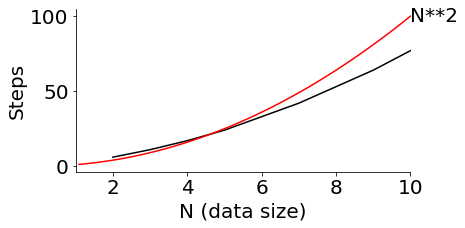

In [31]:
ax = scale_ax()
s.plot.line(ax=ax, c="k")
plot_func("n**2", ax)

In [2]:
def add_v1(low, high):
    nums = range(low, high+1)
    total = 0
    for num in nums:
        total += num
    return total

def add_v2(low, high):
    num_count = high-low+1
    num_avg = (low+high) / 2
    return num_count * num_avg

add_v1(1,10), add_v2(1,10)

(55, 55.0)

In [3]:
(10**2)/2

50.0